In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data = pd.read_csv("data/IRIS.csv")

In [39]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


First visualization, sepal based:

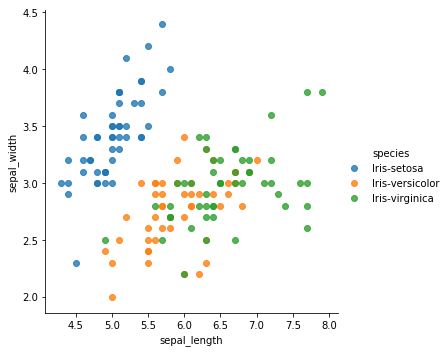

In [40]:
sns.lmplot("sepal_length", "sepal_width", data=data, hue="species", fit_reg=False)

Second visualization, petal based. Much better split in data:

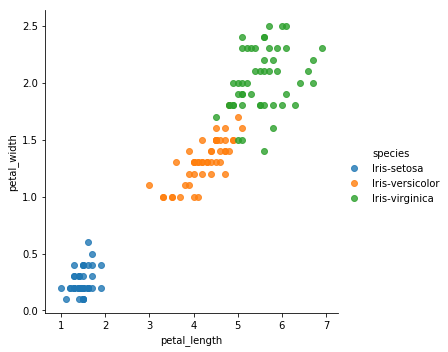

In [41]:
sns.lmplot("petal_length", "petal_width", data=data, hue="species", fit_reg=False)

I'll remove the Iris-virginica type so the dataset only contains two iris types:

In [43]:
data = data[data["species"] != "Iris-virginica"]

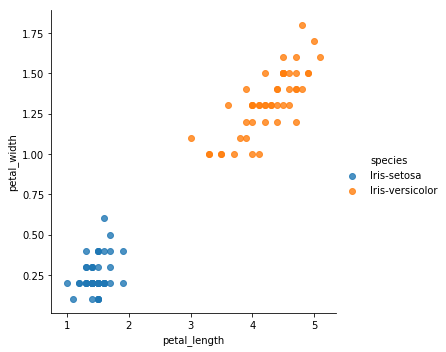

In [44]:
sns.lmplot("petal_length", "petal_width", data=data, hue="species", fit_reg=False)

Convert titles (Iris-setosa, Iris-versicolor) to 0 and 1

Make a features list

In [14]:
type_label = np.where(data["species"] == "Iris-setosa", 0, 1)
iris_features = data.columns.values[:-1].tolist()
iris_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

First ten values of the altered dataset:

In [17]:
flowers = data[["petal_length", "petal_width"]].values; flowers[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

Import support vector machine algoritm and fit the dataset to it:

In [18]:
from sklearn import svm

model = svm.SVC(kernel="linear")
model.fit(flowers, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
w = model.coef_[0]  
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

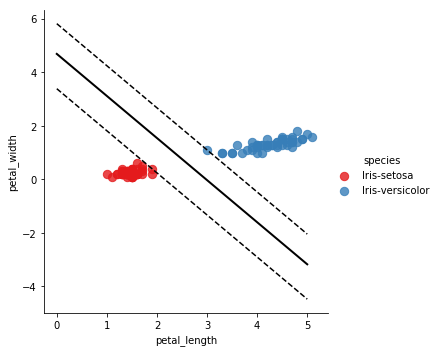

In [30]:
sns.lmplot("petal_length", "petal_width", data=data, hue="species", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color="black")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

In [31]:
# predicting setosa or versicolor
def setosa_or_versicolor(length, width):
    if (model.predict([[length, width]])) == 0:
        print("You are looking at a Iris-setosa")
    else:
        print("You are looking at a Iris-versicolor")

In [32]:
setosa_or_versicolor(2, 0.5)

You are looking at a Iris-setosa


Plotting the new predicted data point:

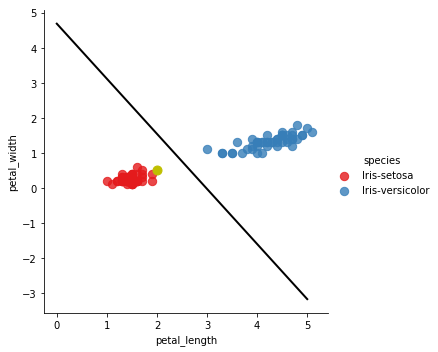

In [34]:
sns.lmplot("petal_length", "petal_width", data=data, hue="species",
          palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color="black")
plt.plot(2, 0.5, "yo", markersize="9")